In [1]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import time
from keras.callbacks import TensorBoard
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import History
#from keras.models import Sequential
#from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

E:\Users\Arnab\Anaconda3\Lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = Sequential()
model_new = VGG16(include_top=False, weights=None, input_shape=(224,224,3))
model.add(model_new)

In [3]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
NAME = "Bangla_Compound_VGG16-{}-conv-{}-dense-{}".format("conv_layers","dense_layers",int(time.time()))
print(NAME)
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME), histogram_freq=0, write_images=True, write_graph=True, update_freq='epoch')



Bangla_Compound_VGG16-conv_layers-conv-dense_layers-dense-1550162591


In [5]:
train_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

training = train_data.flow_from_directory('trainC',target_size=(224,224), batch_size=16,class_mode='categorical')
test = test_data.flow_from_directory('testC',target_size=(224,224), batch_size=16,class_mode='categorical')


Found 33282 images belonging to 171 classes.
Found 8254 images belonging to 171 classes.


In [6]:
model.add(Flatten())

model.add(Dense(1024,activation="relu"))

model.add(Dense(512,activation="relu"))
model.add(Dense(units=171,activation="softmax"))

history = History()
opt= Adam(lr=.00001)
model.compile(optimizer=opt, loss = "categorical_crossentropy", metrics= ["accuracy"])

model.fit_generator(training, epochs=30, validation_data=test, callbacks=[tensorboard,history])

Epoch 1/30
2081/2081 [==============================] - 1195s 574ms/step - loss: 3.9020 - acc: 0.1823 - val_loss: 2.1543 - val_acc: 0.4575
Epoch 2/30
2081/2081 [==============================] - 1193s 573ms/step - loss: 1.5086 - acc: 0.6059 - val_loss: 1.3208 - val_acc: 0.6436
Epoch 3/30
2081/2081 [==============================] - 1189s 571ms/step - loss: 0.8104 - acc: 0.7730 - val_loss: 1.0343 - val_acc: 0.7275
Epoch 4/30
2081/2081 [==============================] - 1176s 565ms/step - loss: 0.4626 - acc: 0.8633 - val_loss: 0.9511 - val_acc: 0.7532
Epoch 5/30
2081/2081 [==============================] - 1176s 565ms/step - loss: 0.2681 - acc: 0.9198 - val_loss: 0.9392 - val_acc: 0.7627
Epoch 6/30
2081/2081 [==============================] - 1176s 565ms/step - loss: 0.1831 - acc: 0.9421 - val_loss: 1.0517 - val_acc: 0.7761
Epoch 7/30
2081/2081 [==============================] - 1176s 565ms/step - loss: 0.1381 - acc: 0.9565 - val_loss: 1.0311 - val_acc: 0.7780
Epoch 8/30
2081/2081 [=====

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


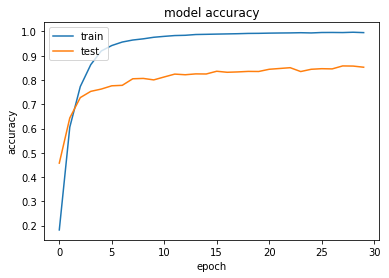

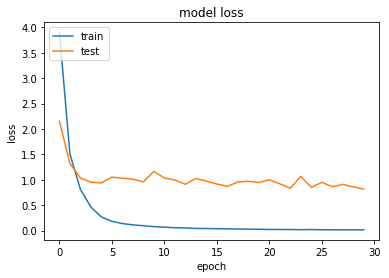

Found 8254 images belonging to 171 classes.
[  0   0 107 ... 170 170 170]
Confusion Matrix
[[37  0  0 ...  0  1  0]
 [ 0 48  0 ...  0  0  0]
 [ 0  0 38 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 1  0  0 ...  0 30  1]
 [ 0  0  0 ...  0  0 44]]
Classification Report
             precision    recall  f1-score   support

          0       0.90      0.74      0.81        50
          1       0.86      0.96      0.91        50
          2       0.84      0.79      0.82        48
          3       0.94      0.98      0.96        47
          4       0.94      0.80      0.86        40
          5       0.85      0.88      0.87        52
          6       0.98      0.93      0.95        43
          7       0.77      0.88      0.82        41
          8       0.82      0.88      0.85        41
          9       0.92      0.88      0.90        40
         10       0.88      0.94      0.91        47
         11       0.89      0.80      0.84        49
         12       0.81      0.94      0.8

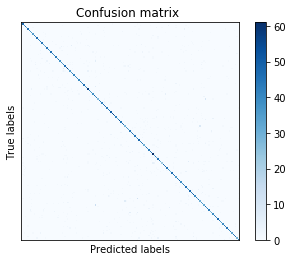

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 171)               87723     
Total params: 41,018,347
Trainable params: 41,018,347
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 432x288 with 0 Axes>

In [10]:

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


testp = test_data.flow_from_directory('testC',target_size=(224,224), batch_size=16,class_mode='categorical',shuffle=False)        
t_pred = model.predict_generator(testp)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1', '2', '3', '4', '5','6', '7', '8', '9']
for k in range(10,171):
    k1=k
    target_names.append(str(k1))
f1 = classification_report(testp.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()
print(model.summary())   


In [8]:
plt.save()

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [9]:
plt.savefig("test.png")

<Figure size 432x288 with 0 Axes>